Simple linear regression without changing categorical variables into dummy variables 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('plot_style_mk.mplstyle')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = ['navy','brown','royalblue'])

## Loading the clean data

In [2]:
file = './Data/Clean rent data_Hamburg.csv'
df = pd.read_csv(file)
df.head()

,Area ($m^2$),Number of rooms,Latitude,Longitude,Rent (in eur)
0,45.43,1.0,53.571509,10.012736,995.0
1,51.86,2.0,53.483600,10.125000,1135.0
2,45.64,2.0,53.492292,9.996217,1118.0
3,52.07,2.0,53.542913,9.995835,1275.0
4,57.25,2.0,53.596390,10.003832,1374.0


In [3]:
print(f'With duplicates = {df.shape}')
print(df.duplicated().any())
df = df.drop_duplicates()
print(f'With out duplicates = {df.shape}')

With duplicates = (858, 5)
False
With out duplicates = (858, 5)


## Importing the model for regression

In [4]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [5]:
# Features
area = df['Area ($m^2$)']
rooms  =df['Number of rooms']
latitude = df['Latitude']
longitude = df['Latitude']
x_full = np.stack((area, rooms, latitude, longitude), axis=1)
# --------------------------------------------------------------------
# Output
rent = df['Rent (in eur)']
y_full = rent

In [6]:
x_train = x_full[:700,:]
y_train = y_full[:700]

In [7]:
scalar = StandardScaler()
x_train_norm = scalar.fit_transform(x_train)

In [8]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(x_train_norm, y_train)
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, Number of weight updates: {sgdr.t_}")
print(sgdr.score(x_train_norm, y_train))

SGDRegressor(max_iter=10000)
Number of iterations completed: 28, Number of weight updates: 19601.0
0.6381470896094914


## Predicting the rent

In [9]:
x_test = x_full[700:,:]
y_test = y_full[700:]
x_test_norm = scalar.fit_transform(x_test)
ypred = sgdr.predict(x_test_norm)

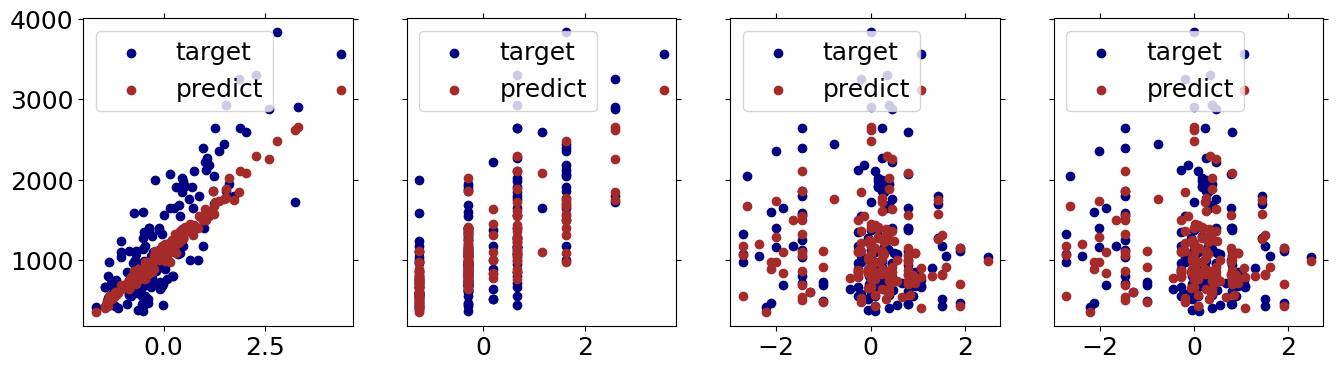

In [10]:
fig1,ax1=plt.subplots(1,4,figsize=(16,4),sharey=True)
for i in range(len(ax1)):
    ax1[i].scatter(x_test_norm[:,i],y_test, label = 'target')
    ax1[i].scatter(x_test_norm[:,i],ypred, label = 'predict')
    ax1[i].legend();

Text(0, 0.5, 'Rent-predi($in\\;eur$)')

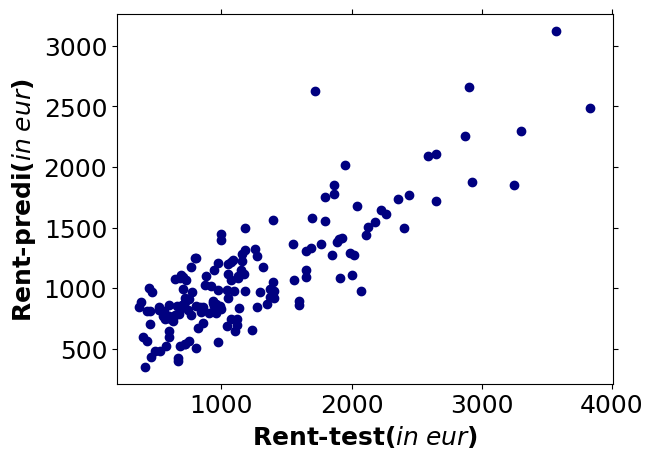

In [12]:
fig4, ax4 = plt.subplots()
ax4.scatter(y_test,ypred)
ax4.set_xlabel('Rent-test($in\;eur$)')
ax4.set_ylabel('Rent-predi($in\;eur$)')
#plt.savefig('model_performance.png', bbox_inches = 'tight')

## Assessing the perfomance of the model

In [13]:
print(f'{sgdr.score(x_test_norm, y_test)}')
from sklearn.metrics import mean_squared_error
print(f'RMSE = {mean_squared_error(y_test, ypred, squared=False)}')

0.6424254977992678
RMSE = 417.8019641457781


# Polynomial regression with the data

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [15]:
poly_features_train = poly.fit_transform(x_train_norm)
poly_features_test = poly.fit_transform(x_test_norm)

In [16]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()

In [17]:
poly_reg_model.fit(poly_features_train, y_train)

LinearRegression()

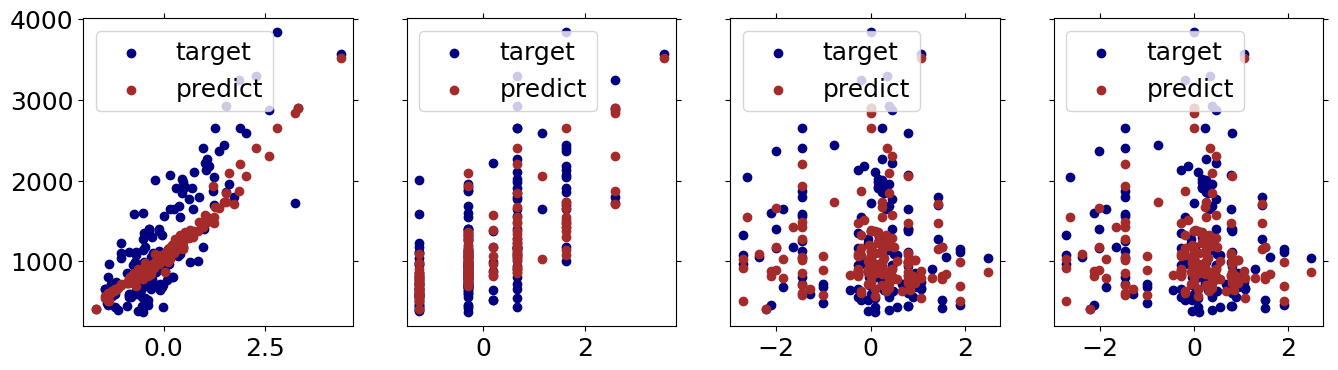

In [18]:
y_pred_poly = poly_reg_model.predict(poly_features_test)

fig2,ax2=plt.subplots(1,4,figsize=(16,4),sharey=True)
for i in range(len(ax2)):
    ax2[i].scatter(x_test_norm[:,i],y_test, label = 'target')
    ax2[i].scatter(x_test_norm[:,i],y_pred_poly, label = 'predict')
    ax2[i].legend();

In [19]:
poly_reg_model.score(poly_features_test, y_test)

0.6359607799396205

Text(0, 0.5, 'Rent-predi($in\\;eur$)')

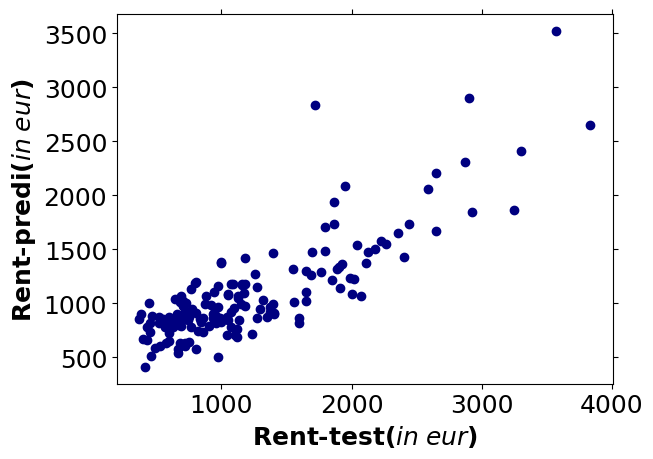

In [20]:
fig3, ax3 = plt.subplots()
ax3.scatter(y_test,y_pred_poly)
ax3.set_xlabel('Rent-test($in\;eur$)')
ax3.set_ylabel('Rent-predi($in\;eur$)')
# plt.savefig('model_performance.png', bbox_inches = 'tight')